In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_canal = pd.read_csv('./Datasets/CanalDeVenta.csv')
df_clientes = pd.read_csv('./Datasets/Clientes.csv', delimiter=';', encoding='utf-8')
df_compra = pd.read_csv('./Datasets/Compra.csv')
df_gasto = pd.read_csv('./Datasets/Gasto.csv')
df_local = pd.read_csv('./Datasets/Localidades.csv')
df_prov = pd.read_csv('./Datasets/Proveedores.csv', encoding='iso-8859-1')
df_suc = pd.read_csv('./Datasets/Sucursales.csv', delimiter=';')
df_tipo = pd.read_csv('./Datasets/TiposDeGasto.csv')
df_venta = pd.read_csv('./Datasets/Venta.csv')

# Clientes

In [19]:
df_clientes = df_clientes.drop(columns='col10')
clients_na = df_clientes.isna().sum().tolist()
clients_na_per = (df_clientes.isna().sum()*100/df_clientes.shape[0]).tolist()
clients_features = df_clientes.columns.tolist()

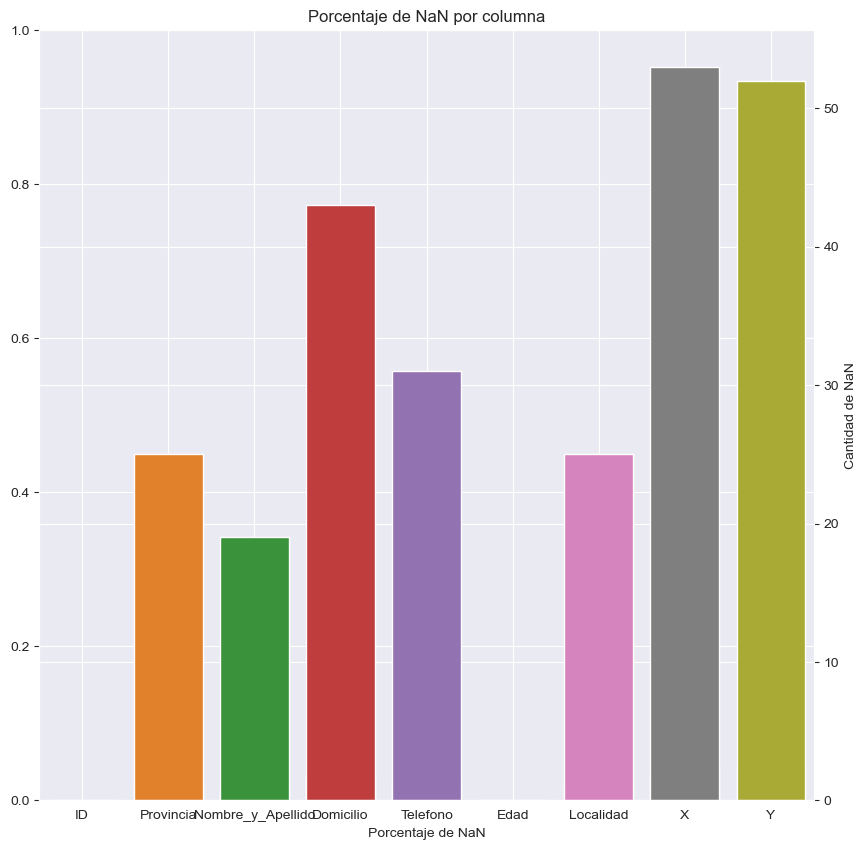

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
fig1 = sns.barplot(x=clients_features, y=clients_na_per)
fig2 = sns.barplot(x=clients_features, y=clients_na)
plt.title('Porcentaje de NaN por columna')
ax.set_xlabel('Columnas')
ax.set_xlabel('Porcentaje de NaN')
ax2.set_ylabel('Cantidad de NaN')
plt.show()

Como se aprecia en el gráfico, los valores faltantes no llegan a representar ni el 2% de los datos. Sólamente las coordenadas superan por muy poco ese límite, y no son datos muy relevantes.

# Ventas

In [36]:
df_venta

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0
...,...,...,...,...,...,...,...,...,...,...
46175,47596,2020-11-30,2020-12-09,1,193,26,3032,42850,279.00,2.0
46176,47597,2020-11-30,2020-12-07,3,333,26,3193,42799,1536.04,2.0
46177,47598,2020-11-30,2020-12-07,1,2389,27,3667,42916,1356.00,2.0
46178,47599,2020-11-30,2020-12-04,1,1067,29,3836,42935,2456.00,1.0


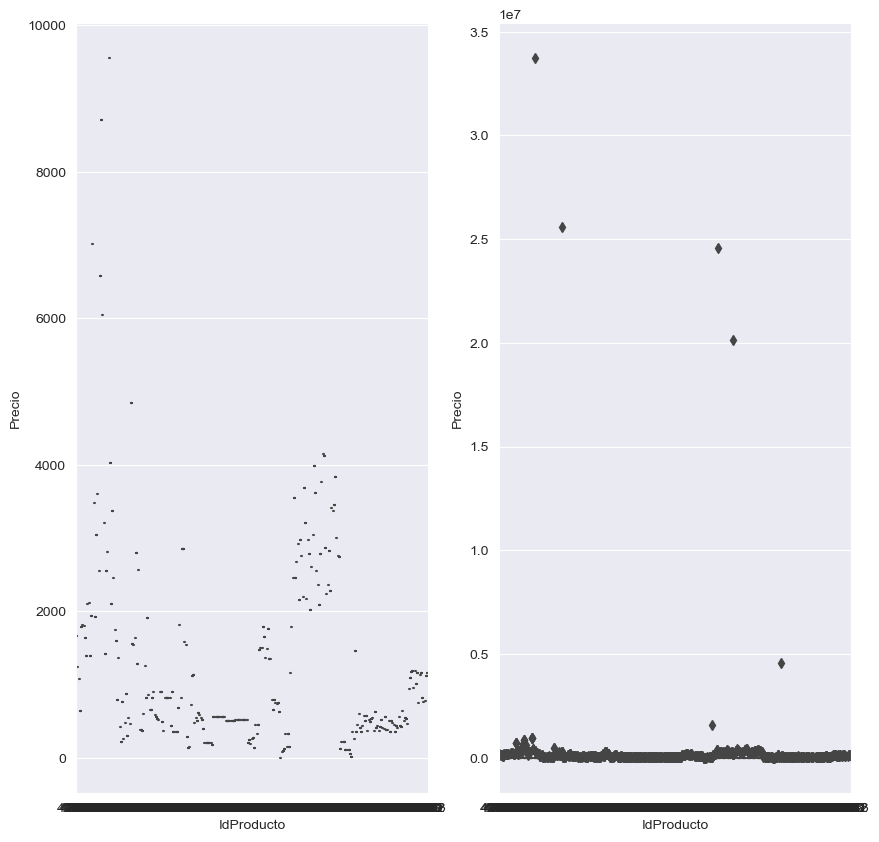

In [50]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
sns.boxplot(ax=ax[0],x='IdProducto', y='Precio', data=df_venta, showfliers=False)
sns.boxplot(ax=ax[1],x='IdProducto', y='Precio', data=df_venta, showfliers=True)

plt.show()

# Gastos

In [43]:
df_gasto

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.90
1,2,18,2,2015-01-01,317.02
2,3,18,3,2015-01-01,118.89
3,4,18,4,2015-01-01,1174.23
4,5,1,1,2015-01-01,1104.51
...,...,...,...,...,...
8635,8636,23,4,2020-12-01,1180.27
8636,8637,24,1,2020-12-01,1152.15
8637,8638,24,2,2020-12-01,305.98
8638,8639,24,3,2020-12-01,104.32


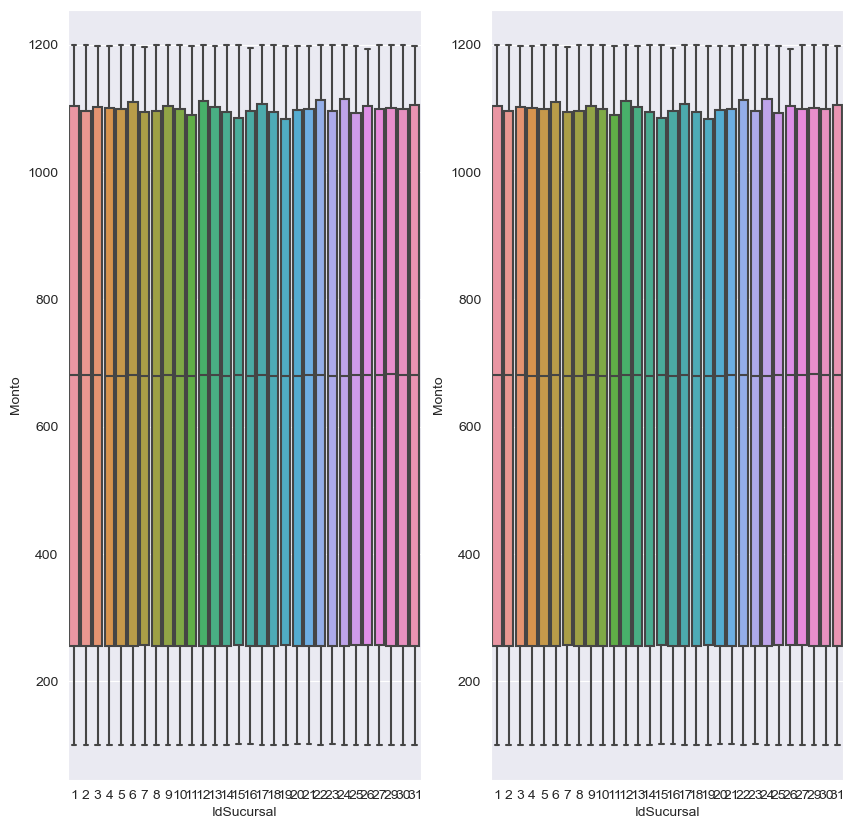

In [45]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
sns.boxplot(ax=ax[0],x='IdSucursal', y='Monto', data=df_gasto, showfliers=False)
sns.boxplot(ax=ax[1],x='IdSucursal', y='Monto', data=df_gasto, showfliers=True)
plt.show()

# Compra

In [46]:
df_compra

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2
...,...,...,...,...,...,...,...,...,...
11534,11535,12/25/2020,2020,12,202012,42978,6,88.29,10
11535,11536,12/25/2020,2020,12,202012,42979,2,81.24,10
11536,11537,12/25/2020,2020,12,202012,42980,1,71.67,3
11537,11538,12/25/2020,2020,12,202012,42981,3,35.55,9


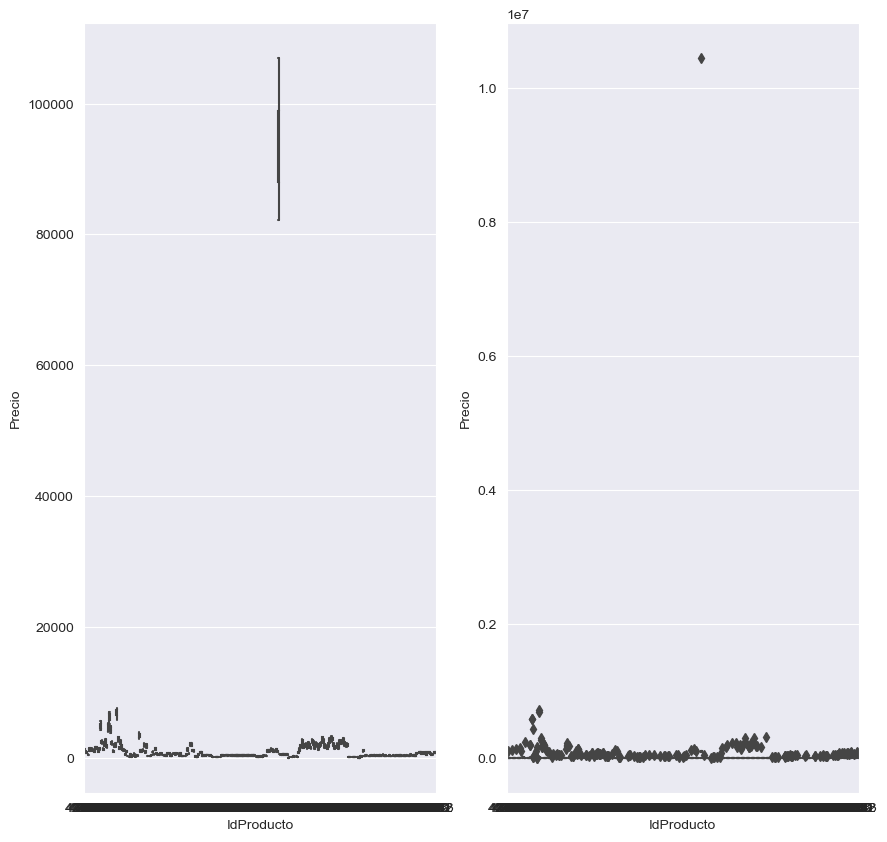

In [49]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
sns.boxplot(ax=ax[0],x='IdProducto', y='Precio', data=df_compra, showfliers=False)
sns.boxplot(ax=ax[1],x='IdProducto', y='Precio', data=df_compra, showfliers=True)
plt.show()

Como vemos en los gráficos de caja, hay muchos outliers en los datos de compra y venta si lo analizamos por producto. Habría que revisar a qué se deben esas discrepancias en precios de un mismo producto.